## Matplotlib 

Matplotlib adalah salah satu library dalam python yang digunakan untuk visualisasi data. Sebelumnya, perlu diketahui terlebih dahulu perbedaan istilah **Figure, Axes, dan Axis** dalam matplotlib.



**Figure** : objek matplotlib yang mengandung semua elemen dari sebuah grafik

**Axes** : Actual plot di dalam figure

**Axis** : x-axis/y-axis dalam specific plot

Atau sederhananya, Figure adalah sebuah kanvas, Axes adalah gambarnya. Satu figure bisa terdiri dari beberapa gambar/plot (axes).

Misalnya :

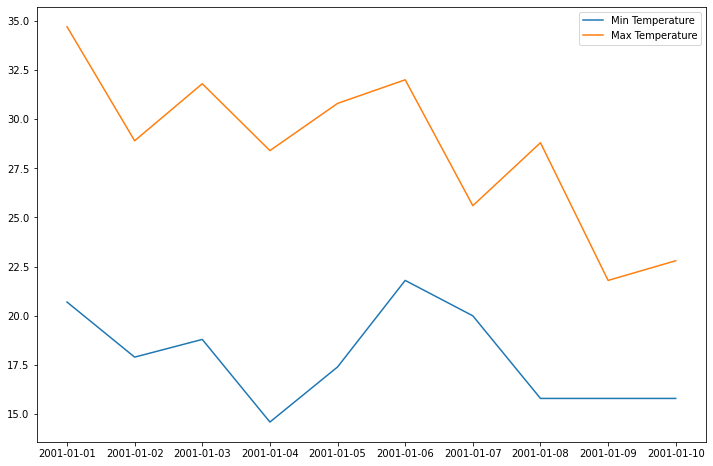

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

dates = [
    '2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04', '2001-01-05',
    '2001-01-06', '2001-01-07', '2001-01-08', '2001-01-09', '2001-01-10'
]
min_temperature = [20.7, 17.9, 18.8, 14.6, 17.4, 21.8, 20.0, 15.8, 15.8, 15.8]
max_temperature = [34.7, 28.9, 31.8, 28.4, 30.8, 32.0, 25.6, 28.8, 21.8, 22.8]

fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
#nrows=1, ncols=1, berarti membuat figure yang dapat memuat 1 axes saja (1x1)

axes.plot(dates, min_temperature, label='Min Temperature')
axes.plot(dates, max_temperature, label = 'Max Temperature')
axes.legend()

Terdapat metode-metode lain untuk Axes, seperti:
* Axes.set_xlabel()         
* Axes.set_ylabel()
* Axes.set_xlim()           
* Axes.set_ylim()
* Axes.set_xticks()         
* Axes.set_yticks()
* Axes.set_xticklabels()    
* Axes.set_yticklabels()
* Axes.set_title()
* Axes.tick_params()

Perhatikan contoh di bawah ini:

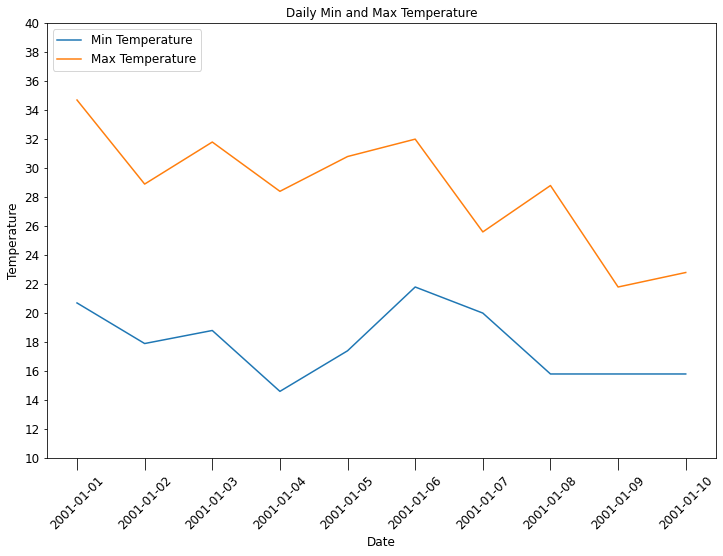

In [ ]:
fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(12,8))     #membuat figure dan axes  
axes.plot(dates, min_temperature, label='Min Temperature')
axes.plot(dates, max_temperature, label='Max Temperature')

axes.set_xlabel('Date',fontsize=12)
axes.set_ylabel('Temperature',fontsize=12)

axes.set_title('Daily Min and Max Temperature',fontsize=12)

axes.set_xticks(dates)
axes.set_xticklabels(dates)
axes.tick_params('x', labelsize=12, labelrotation=45, size=12)


axes.set_ylim(10,40)
axes.set_yticks(np.arange(10,41,2))
axes.tick_params('y',labelsize=12)

axes.legend(fontsize=12,loc='upper left')

### Import data

Data yang akan digunakan adalah data mengenai jumlah imigrasi ke negara Kanada pada tahun tertentu

Run code di bawah ini :

In [ ]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2 )

df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
df_can.columns = list(map(str, df_can.columns))
df_can.set_index('Country', inplace=True)
df_can['Total'] = df_can.sum(axis=1)
years = list(map(str, range(1980, 2014)))

In [ ]:
df_can.head()  # 5 baris pertama

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [ ]:
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

### A) Line Plot

Line plot adalah salah satu jenis plot yang menampilkan informasi sebagai titik-titik data(markers) yang tersambung oleh garis lurus. Gunakan df.plot(kind='line') untuk membuat line plot.

Akan dibuat line plot mengenai imigrasi penduduk negara Algeria ke Kanada

In [ ]:
algeria = df_can.loc['Algeria', years] # filter index 'Algeria' dengan kolom years 
algeria.head()

1980    80
1981    67
1982    71
1983    69
1984    63
Name: Algeria, dtype: object

Text(0.5, 0, 'Years')

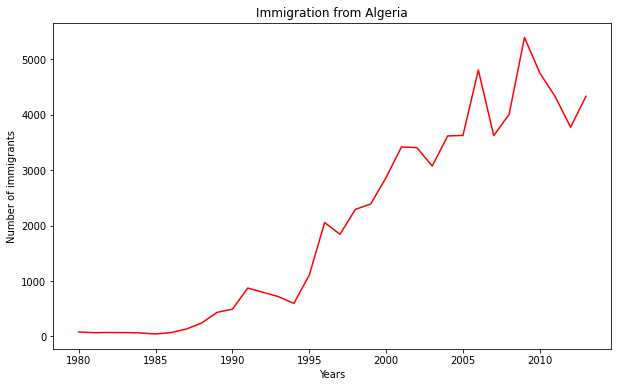

In [ ]:
algeria.index = algeria.index.map(int) # ganti tipe index dari str ke int untuk plotting
algeria.plot(kind='line', figsize=(10, 6), color='red')

plt.title('Immigration from Algeria')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

Gabungkan data diatas dengan data dari negara Haiti

In [ ]:
haiti = df_can.loc['Haiti', years]
haiti.index = haiti.index.map(int)

Text(0.5, 0, 'Years')

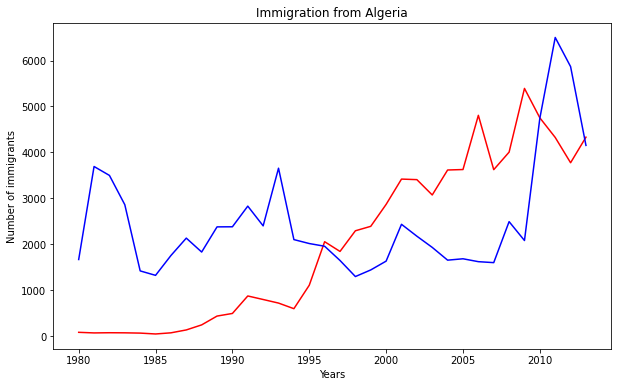

In [ ]:
algeria.plot(kind='line', figsize=(10, 6), color='red')
haiti.plot(kind='line', figsize=(10, 6), color='blue')

plt.title('Immigration from Algeria')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

### B) Scatter Plot

Scatterplot adalah Grafik yang biasa digunakan untuk melihat suatu pola hubungan antara 2 variabel. Gunakan df.plot(kind='scatter') untuk membuat scatter plot.

Akan didefinisikan sebuah variabel baru berisi total imigrasi pada setiap tahun

In [ ]:
df_total = pd.DataFrame(df_can[years].sum(axis=0))
df_total.reset_index(inplace = True)
df_total.columns = ['year', 'total']

df_total.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


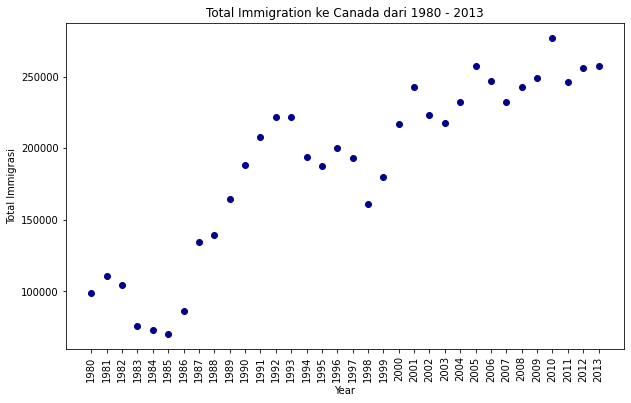

In [ ]:
df_total.plot(x='year', y='total', kind='scatter', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration ke Canada dari 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Total Immigrasi')
plt.xticks(rotation='vertical')

plt.show()

Atau bisa juga:

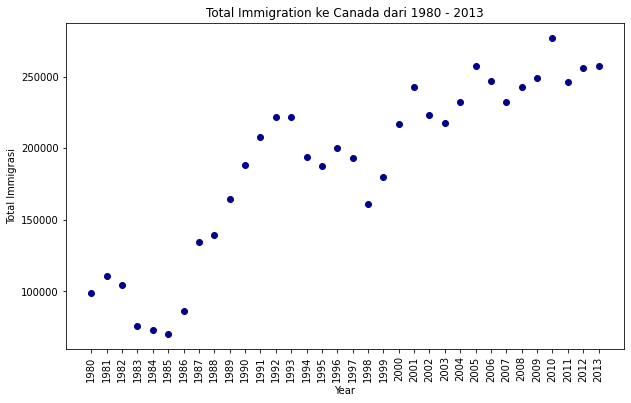

In [ ]:
plt.figure(figsize=(10,6))    #Define figure harus diawal, istilahnya kita taruh kanvas(figure) dulu baru taruh gambarnya(plot)
plt.scatter(x='year', y='total', data=df_total, color='darkblue')

plt.title('Total Immigration ke Canada dari 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Total Immigrasi')
plt.xticks(rotation='vertical')

plt.show()

### C) Pie Chart

Pie chart adalah grafik statistik yang menampilkan potongan-potongan pie dengan ukuran tertentu, dimana total persentasenya mencapai 100%. Gunakan df.plot(kind='pie') untuk membuat pie chart.

Pada contoh ini, akan dibuat grafik total imigrasi untuk setiap benua. Pertama, kelompokkan jumlah imigrasi berdasarkan continent dengan fungsi groupby 

In [ ]:
df_continents = df_can.groupby('Continent', axis=0).sum()
df_continents.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531,13072,14806,15700,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,68301,57938,64123,62937,62531,55764,55642,48841,36719,35639,38215,42779,36798,34556,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,27942,36827,37853,33840,21341,20262,18645,17174,13830,15088,16898,20067,19317,20263,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5895,6057,6846,7438,5902,4891,5516,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


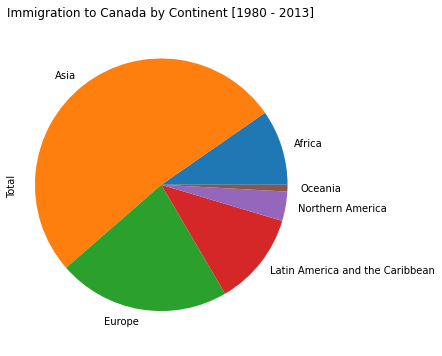

In [ ]:
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6)
                            #autopct='%1.1f%%', # add in percentages
                            #startangle=90,     # start angle 90° (Africa)
                            #shadow=True,       # add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

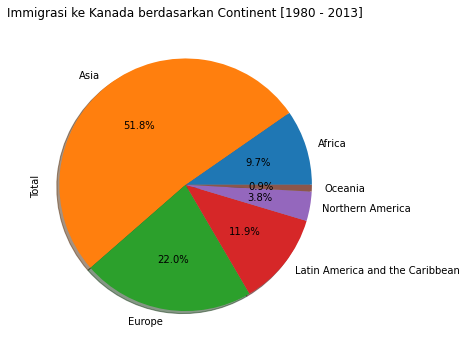

In [ ]:
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # tampilkan persentase
                            shadow=True,       # efek bayangan    
                            )

plt.title('Immigrasi ke Kanada berdasarkan Continent [1980 - 2013]')
plt.axis('equal') # equal aspect ratio, memastikan plot dihasilkan adalah lingkaran

plt.show()

Plot yang dihasilkan di atas masih kurang jelas, teksnya cenderung saling berdekatan satu sama lain.

Akan dilakukan beberapa modifikasi:
* Pindahkan label teks yang berada dalam pie chart ke dalam `legend` menggunakan `plt.legend()`.
* Pindahkan persentase keluar chart menggunakan parameter `pctdistance`.
* Berikan warna yang berbeda untuk setiap continent dengan parameter `colors`.
* Berikan efek **Explode** pada pie chart untuk  highlight tiga benua dengan jumlah imigrasi terendah(Africa, North America, and Latin America and Carribbean) melalui parameter `explode`.

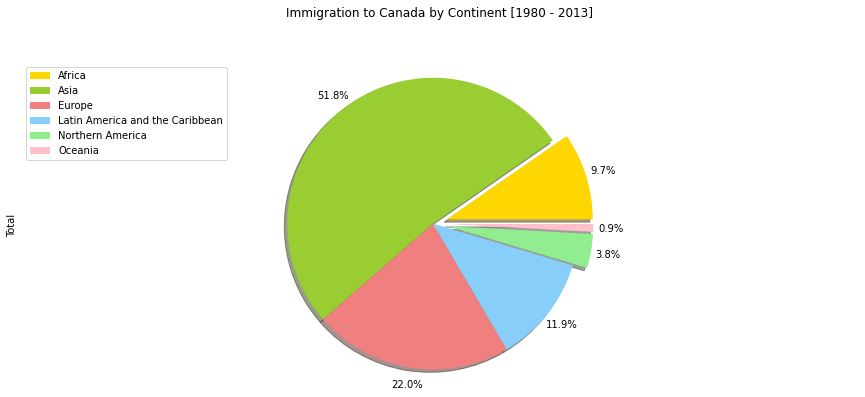

In [ ]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio untuk tiap continent untuk parameter explode nanti.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',     
                            shadow=True,       
                            labels=None,         # hilangkan labels pada pie chart
                            pctdistance=1.12,    # jarak/ratio antara pusat tiap slice pie chart dengan tulisan persentase
                            colors=colors_list,  # warna pie chart
                            explode=explode_list # 'explode' 3 continents terendah
                            )

#perbesar skala judul sebesar 12% agar rapihh dengan plotnya (bikin judul dan plot sedikit jauh)
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 
plt.axis('equal') 
plt.legend(labels=df_continents.index, loc='upper left') #letakkan legend di kiri atas

plt.show()

### D) Bar Chart

Bar Chart, ya grafik batang. 

Akan digunakan contoh sebelumnya mengenai jumlah imigrasi dari negara haiti ke kenada. Gunakan **df.plot(kind='bar')** untuk grafik vertikal dan **df.plot(kind='barh')** untuk grafik horizontal.

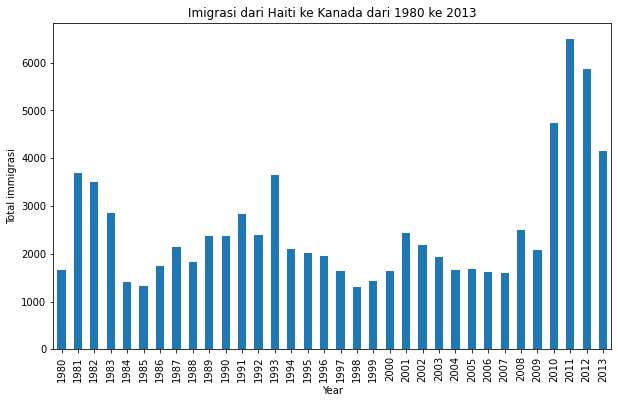

In [ ]:
haiti.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') 
plt.ylabel('Total immigrasi') 
plt.title('Imigrasi dari Haiti ke Kanada dari 1980 ke 2013') 

plt.show()

Tampilkan dalam bentuk horizontal dengan df.plot(kind='barh')

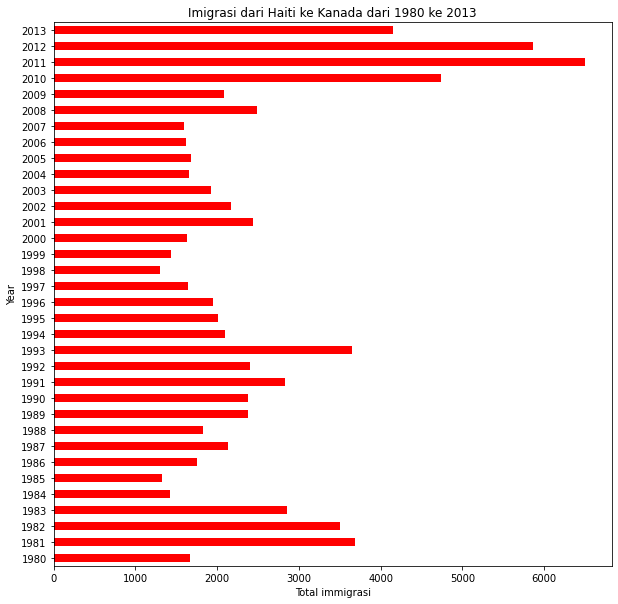

In [ ]:
haiti.plot(kind='barh', color='r', figsize=(10, 10))

plt.ylabel('Year')    #jangan lupa menukar x dan y label jika ingin menggunakan bar horizontal
plt.xlabel('Total immigrasi') 
plt.title('Imigrasi dari Haiti ke Kanada dari 1980 ke 2013') 

plt.show()

### Subplots

Seperti yang telah dijelaskan di awal, satu figure bisa saja memuat beberapa axes(plot). Untuk menvisualisasikan plot-plot secara bersamaan, kita dapat membuat sebuah *figure* lalu membaginya menjadi beberapa *subplots* 

In [ ]:
fig = plt.figure() # Membuat figure
ax = fig.add_subplot(nrows, ncols, plot_number) # Membuat subplots

Dimana *nrows* dan *ncols* menyatakan bahwa figure terbagi menjadi (*nrows* * *ncols*) sub axes. *plot_number* menyatakan subplot berada di sub axes ke-*plot_number*. Lihat contoh di bawah ini:

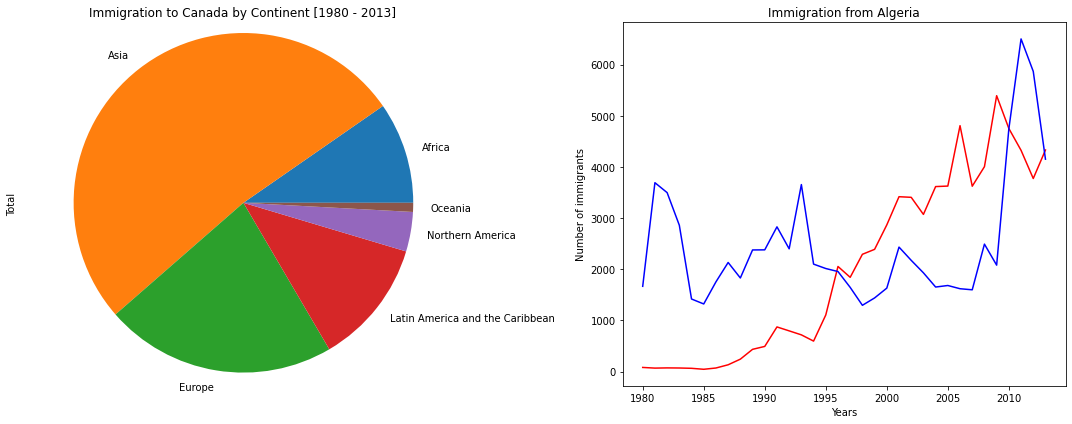

In [ ]:
fig = plt.figure(figsize=(30,20)) # Membuat figure

ax0 = fig.add_subplot(1, 2, 1) # Tambahkan subplot 1 (1 row, 2 columns, plot pertama)
ax1 = fig.add_subplot(1, 2, 2) # Tambahkan subplot 2 (1 row, 2 columns, plot kedua)

# Subplot 1: Scatter plot
df_continents['Total'].plot(kind='pie', figsize=(10, 6), ax=ax0) #tambahkan ke subplot 1

ax0.set_title('Immigration to Canada by Continent [1980 - 2013]')
ax0.axis('equal') # Sets the pie chart to look like a circle.

# Subplot 2: Line plot
algeria.plot(kind='line', figsize=(15, 6), color='red', ax=ax1) #tambahkan ke subplot 2
haiti.plot(kind='line', figsize=(15, 6), color='blue', ax=ax1)

ax1.set_title('Immigration from Algeria')
ax1.set_ylabel('Number of immigrants')
ax1.set_xlabel('Years')

fig.tight_layout() #memastikan jarak tiap subplot tidak nempel
plt.show()

## Seaborn


Seaborn adalah salah satu library untuk visualisasi data yang dibangun di atas matplotlib. Import library di bawah ini sebelum melakukan visualisasi dan pengolahan data:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
iris = sns.load_dataset('iris')  #load dataset dari online repository, selengkapnya( https://github.com/mwaskom/seaborn-data )

Iris dataset adalah data berisi informasi mengenai bunga (ukuran, species). Biasanya, pengolah data diharapkan untuk memprediksi species bunga dari feature yang tersedia.

In [ ]:
iris.head() #5 baris pertama

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Dalam Seaborn, terdapat 3 cara untuk menampilkan data pada plot, yaitu melalui:

1. Lists, Arrays, atau Series
2. Pandas Dataframe dan Nama Kolom
3. Hanya Dataframe saja
**1. Lists, Arrays, atau Series**


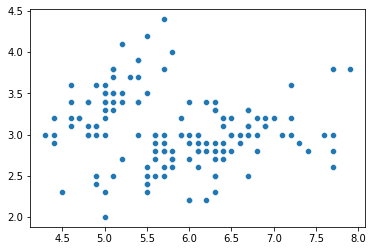

In [ ]:
sepal_length = iris['sepal_length'].values
sepal_width = iris['sepal_width'].values
sns.scatterplot(x=sepal_length, y=sepal_width)

**2. Pandas Dataframe dan Nama Kolom**

Nama dataframe disisipkan pada argumen *data*, sehingga pada argumen *x* dan *y* cukup dimasukkan nama kolom

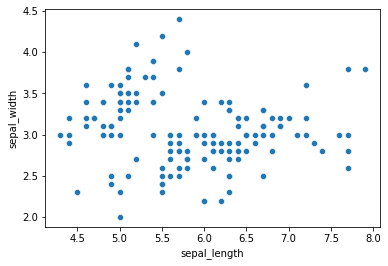

In [ ]:
sns.scatterplot(x='sepal_length',y='sepal_width', data=iris)

**3. Hanya Dataframe saja**

Pada metode ini, setiap kolom numerik akan di-plot secara otomatis tanpa harus dimasukkan nama kolom terlebih dahulu. Namun cara ini hanya berlaku pada : 
*stripplot(), swarmplot(), boxplot(), boxenplot(), violinplot(), pointplot(), barplot(), countplot()*

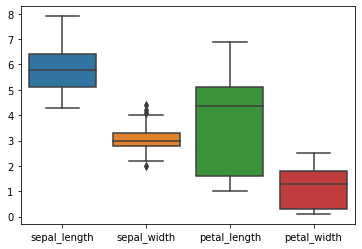

In [ ]:
sns.boxplot(data=iris)

Seaborn akan secara otomatis menampilkan data yang numerik. Boxplot disini dapat membantu kita melihat distribusi data dari setiap feature serta mendeteksi ada atau tidaknya outlier untuk setiap feature.

### A) Scatter Plot

Sebelumnya, telah ditunjukkan penggunaan sns.scatterplot() diatas, disini akan ditunjukkan kembali penggunaan scatterplot pada ukuran petal bunga:

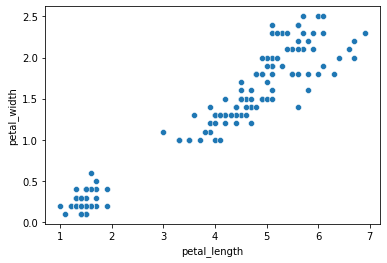

In [ ]:
sns.scatterplot(x='petal_length',y='petal_width', data=iris)

Dengan bantuan argumen *hue*, kita dapat memeriksa jenis spesies untuk tiap titik pada scatterplot dengan set argumen *hue = species*

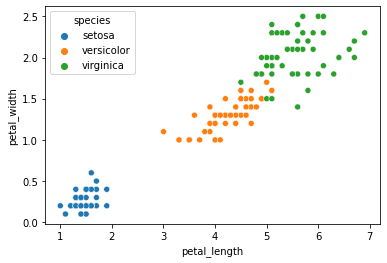

In [ ]:
sns.scatterplot(x='petal_length',y='petal_width', data=iris, hue='species')

Kini terlihat bahwa range petal_length dan petal_width pada species **setosa** (biru) cenderung rendah dibandingkan yang lain. Sedangkan spesies **virginica** (hijau) memiliki petal_length dan petal_width yang relatif tinggi. Terlihat pula bahwa korelasi kedua variabel ini tinggi sekali.

In [ ]:
#tambahan
iris['petal_length'].corr(iris['petal_width'])  #melihat korelasi antar kedua variabel

0.9628654314027961

sns.regplot akan membantu kita menampilkan scatterplot beserta garis regresinya.

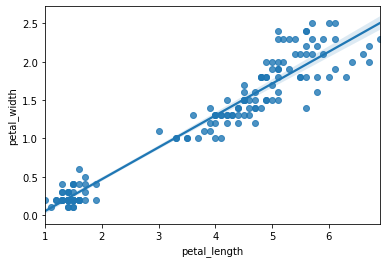

In [ ]:
sns.regplot(x='petal_length',y='petal_width', data=iris)

### B) Distribution Plot

Seperti namanya, distribution plot digunakan untuk memeriksa distribusi pada data. Biasanya, kita ingin memeriksa apakah data kita berdistribusi normal, atau apakah terdapat skewness pada data, dll. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


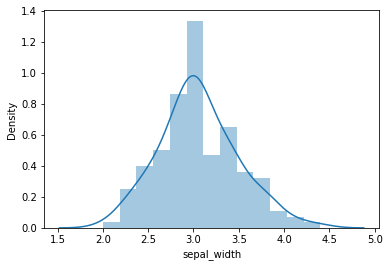

In [ ]:
sns.distplot(iris['sepal_width'])

In [ ]:
#Sebagai tambahan, skewness pada data diatas dapat diperiksa melalui:
print(iris['sepal_width'].skew())       #skewness of normal distribution = 0

0.31896566471359966


*Distribusi data juga dapat diperiksa melalui histogram, dengan fungsi sns.hist()

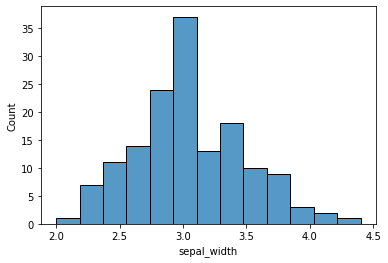

In [ ]:
sns.histplot(iris['sepal_width'])

Warna dari plot dapat dapat diubah melalui argumen *color* (Cek dokumentasi untuk selengkapnya : https://seaborn.pydata.org/generated/seaborn.distplot.html )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


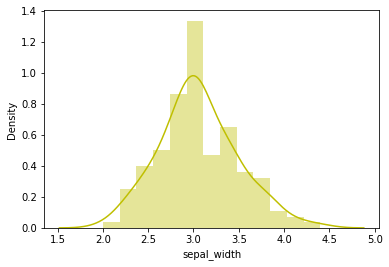

In [ ]:
sns.distplot(iris['sepal_width'], color='y')

### C) Count Plot

Untuk memeriksa jumlah observasi untuk tiap jenis data kategorik dalam satu kolom, dapat digunakan sns.countplot(). Count Plot adalah salah satu jenis bar plot.

In [ ]:
tips = sns.load_dataset("tips") #load dataset baru 'tips'
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


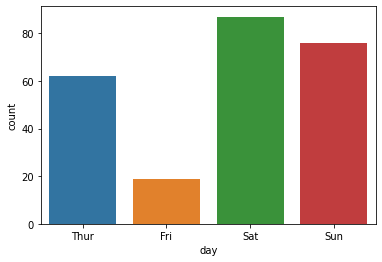

In [ ]:
sns.countplot(x="day", data=tips)

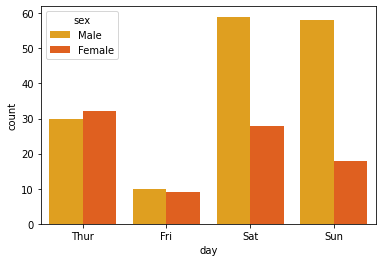

In [ ]:
sns.countplot(x="day", data=tips, hue='sex', palette="autumn_r")  #spesifik jenis kelamin + palette warna yang berbeda

Untuk menggambarkan countplot secara horizontal, ganti *x='day'* menjadi y='day'

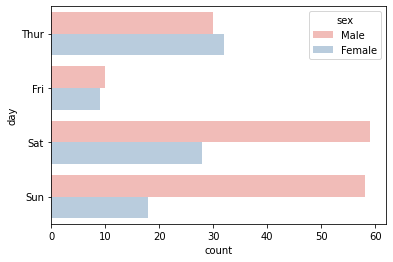

In [ ]:
sns.countplot(y="day", data=tips, hue='sex', palette="Pastel1") 

### D) Box Plot



Boxplot digunakan untuk menunjukkan distribusi dan peneyebaran data serta membantu untuk mendeteksi outlier

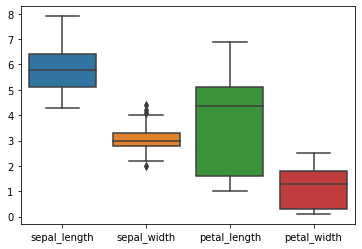

In [ ]:
sns.boxplot(data=iris)

Pada plot di atas, sepal_width memiliki range penyebaran yang paling sempit (warna jingga) dan juga memiliki outlier (berdasarkan interquartile rule). Akan dibuat plot untuk sepal_width:

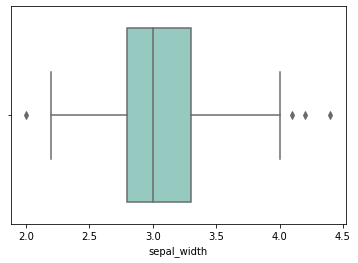

In [ ]:
sns.boxplot(x='sepal_width', data=iris, palette="Set3")   
#ganti ke y='sepal_width' jika ingin ditampilkan vertikal seperti sebelumnya

Perhatikan pada boxplot diatas, garis tengah yang berada di angka 3 menunjukkan median (Q2), garis kiri dan kanan di permukaan luar kotak masing-masing menunjukkan Q1 dan Q3.

Pada boxplot, IQR (Interquartile Range) didefinisikan sebagai Q3-Q1. Garis vertikal di ujung kiri diperoleh dari Q1 - (1.5)IQR, sedangkan garis vertikal yang di ujung kanan diperoleh dari Q3 + (1.5)IQR.

Berdasarkan IQR rule, titik-titik yang berada di luar jangkauan kedua garis tadi dianggap sebagai outlier. Pengolah data dapat memilih untuk menghapus baris yang mengandung outlier tersebut, tetapi tetap perlu mengetahui alasan outlier itu terjadi. *(Misal, tragedi Flint Water Crisis yang terjadi akibat 'membuang' 2 data yang dianggap sebagai outlier, https://www.linkedin.com/pulse/5-statistical-lessons-from-flint-water-crisis-rick-wicklin)*

### E) Heatmap

Heatmap digunakan untuk membuat matrixplot antar variabel. Heatmap dapat digunakan untuk memeriksa korelasi antar feature (predictor/variabel independen), korelasi terhadap target (y variable), untuk melihat missing value, dll

In [ ]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


Nyatakan dalam bentuk heatmap

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text major ticklabel objects>)

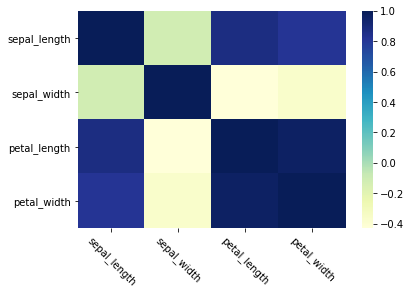

In [ ]:
sns.heatmap(iris.corr(), cmap="YlGnBu")   #membuat matrix plot untuk korelasi antar variabel
plt.xticks(rotation=-45)  #rotasi x tick sebesar 45 derajat

Argumen *cmap* digunakan untuk mengganti warna. Berdasarkan colorbar di kanan, semakin gelap warnanya, semakin tinggi pula korelasi antar variabelnya. 

Untuk mengatasi masalah multikolinearitas, biasanya kita membuang salah satu dari dua variabel X yang saling berkorelasi (threshold of >0.8 umumnya digunakan, artinya jika korelasi antar 2 variabel >0.8, maka salah satu variabel dapat dibuang).


*Tambahan

*Selain cara diatas, cara lain untuk melakukan feature elimination adalah dengan RFECV (selengkapnya: https://machinelearningmastery.com/rfe-feature-selection-in-python/)*